In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [55]:
data=pd.read_csv("C:\\Users\\ujwala\\Downloads\\bank-full.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [21]:
data.shape

(45211, 1)

In [65]:
data.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')

In [63]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [74]:
data.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [75]:
data.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [76]:
data.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [77]:
data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [78]:
data.var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [79]:
data.kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [80]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [39]:
data.isnull().sum()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64

In [59]:
data1 = data.drop(['day','month','duration'], axis=1)
data1

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,1,-1,0,unknown,no


In [60]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,no


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [66]:
data1.shape

(45211, 14)

# univariate analysis

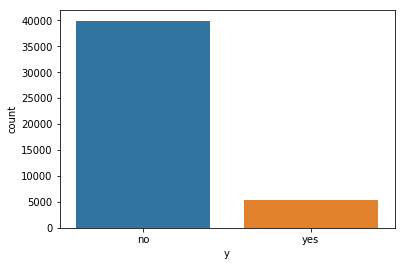

In [67]:
sns.countplot(x="y",data=data)

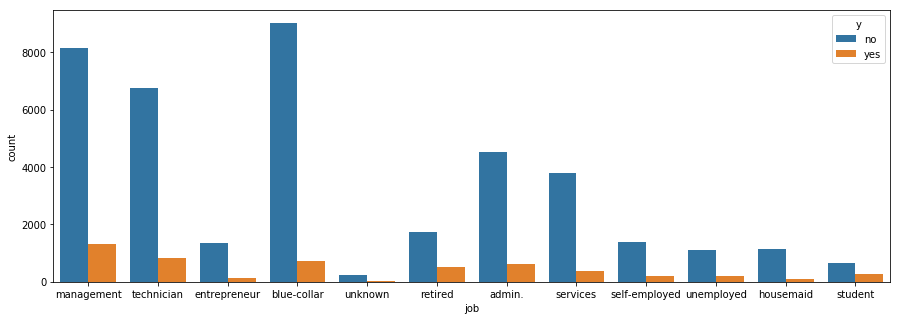

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x="job",data=data,hue = 'y')

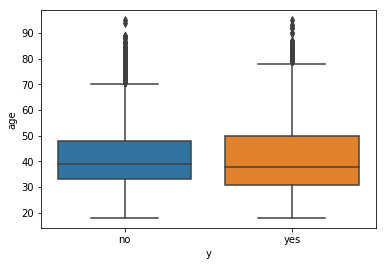

In [69]:
sns.boxplot(data=data,x='y',y='age')

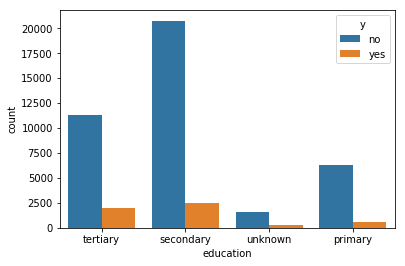

In [70]:
sns.countplot(x="education",data=data,hue = 'y')

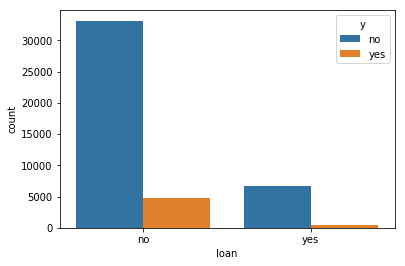

In [73]:
sns.countplot(x="loan",data=data,hue = 'y')

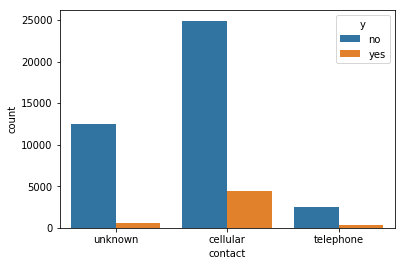

In [81]:
sns.countplot(x="contact",data=data,hue = 'y')

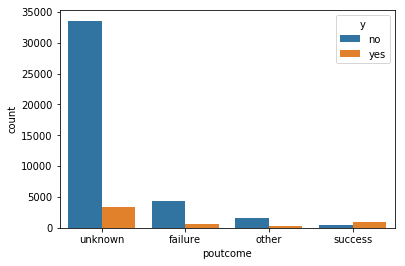

In [82]:
sns.countplot(x="poutcome",data=data,hue = 'y')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1260FD10>,
      dtype=object)

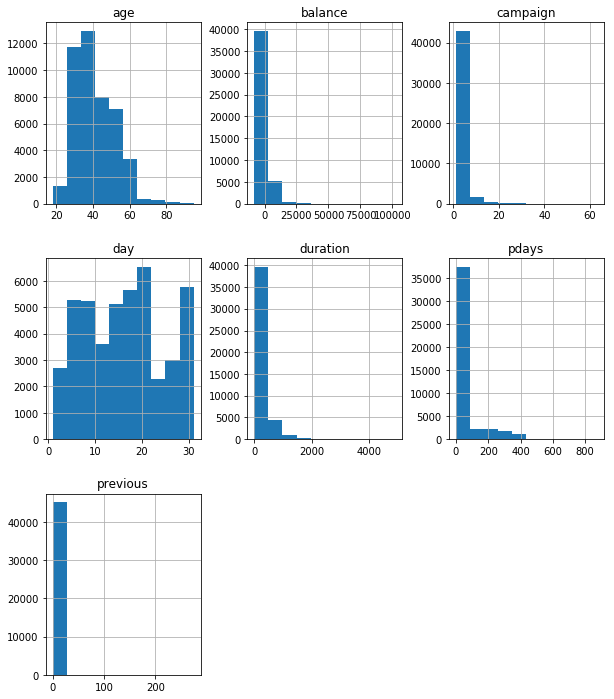

In [85]:
data.hist(figsize=(10,12))

# Data Processing

In [87]:
data[['job','marital','education','default','housing','loan','contact','poutcome','month',
       'y']] = data[['job','marital','education','default','housing','loan','contact','poutcome','month', 'y']].astype('category')
data1 = data

In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
y            45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [89]:
#Label Encoding

data1['month'] = data1['month'].cat.codes
data1['job'] = data1['job'].cat.codes
data1['marital'] = data1['marital'].cat.codes
data1['education'] = data1['education'].cat.codes
data1['default'] = data1['default'].cat.codes
data1['housing'] = data1['housing'].cat.codes
data1['loan'] = data1['loan'].cat.codes
data1['contact'] = data1['contact'].cat.codes
data1['poutcome'] = data1['poutcome'].cat.codes
data1['y'] = data1['y'].cat.codes

In [90]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,16]

x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3


In [91]:
x1 = x.clip(lower=0)      # Replacing all negative values of x with 0

# Feature Selection

Corelation Hetmaps and Matrix

In [98]:
corrmat = data1.corr()

In [99]:
corrmat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [101]:
top_corr_features = corrmat.index

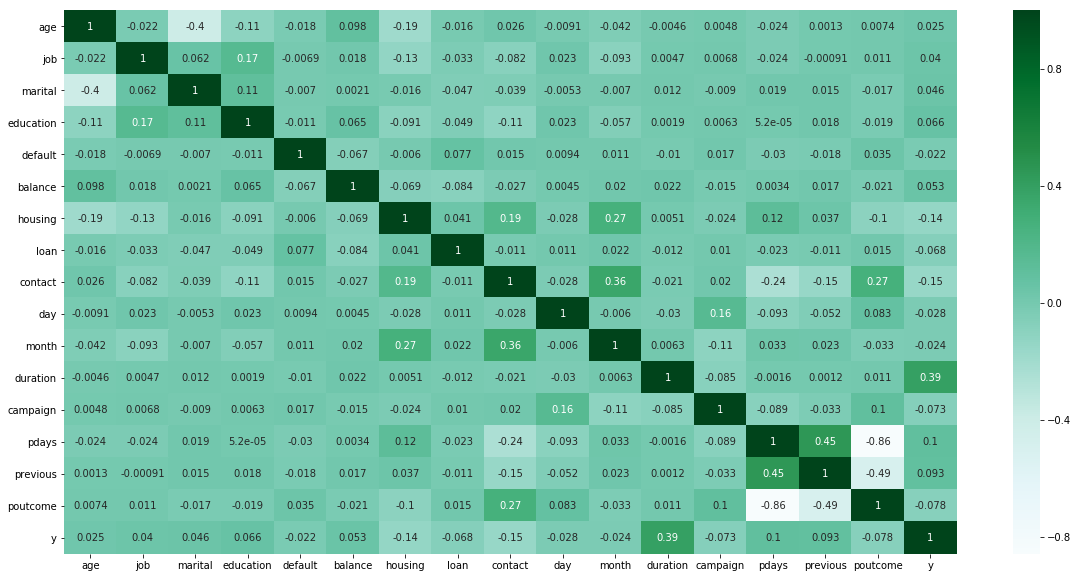

In [102]:
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="BuGn")

# Univariant Selection using SelectKBest

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [104]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(x1,y)

In [105]:
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(x1.columns)

In [106]:
#concat two dataframes for better visualization 

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [108]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
11  duration  1.807711e+06
5    balance  7.884598e+05
13     pdays  1.171871e+05
14  previous  3.593220e+03
8    contact  1.253814e+03
12  campaign  8.405821e+02
6    housing  3.889497e+02
1        job  1.824523e+02
7       loan  1.765161e+02
9        day  1.592004e+02


In [109]:
data_x = x1[['duration', 'balance', 'pdays', 'previous', 'contact', 'campaign', 'housing', 'job', 'loan', 'day']]
data_x.head(5),m

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
0,261,2143,0,0,2,1,1,4,0,5
1,151,29,0,0,2,1,1,9,0,5
2,76,2,0,0,2,1,1,2,1,5
3,92,1506,0,0,2,1,1,1,0,5
4,198,1,0,0,2,1,0,11,0,5


In [110]:
data_x.describe()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,258.163080,1388.734069,41.015195,0.580323,0.640242,2.763841,0.555838,4.339762,0.160226,15.806419
std,257.527812,3029.530442,99.792615,2.303441,0.897951,3.098021,0.496878,3.272657,0.366820,8.322476
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,103.000000,72.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
50%,180.000000,448.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,16.000000
75%,319.000000,1428.000000,0.000000,0.000000,2.000000,3.000000,1.000000,7.000000,0.000000,21.000000
max,4918.000000,102127.000000,871.000000,275.000000,2.000000,63.000000,1.000000,11.000000,1.000000,31.000000


In [111]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

In [112]:
data_x.corr()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
duration,1.000000,0.021325,-0.001584,0.001203,-0.020839,-0.084570,0.005075,0.004744,-0.012412,-0.030206
balance,0.021325,1.000000,0.002627,0.016018,-0.025614,-0.014164,-0.065279,0.017850,-0.079532,0.005788
pdays,-0.001584,0.002627,1.000000,0.454288,-0.244526,-0.088508,0.124350,-0.024531,-0.022709,-0.093024
previous,0.001203,0.016018,0.454288,1.000000,-0.147811,-0.032855,0.037076,-0.000911,-0.011043,-0.051710
contact,-0.020839,-0.025614,-0.244526,-0.147811,1.000000,0.019614,0.188123,-0.082063,-0.010873,-0.027936
campaign,-0.084570,-0.014164,-0.088508,-0.032855,0.019614,1.000000,-0.023599,0.006839,0.009980,0.162490
housing,0.005075,-0.065279,0.124350,0.037076,0.188123,-0.023599,1.000000,-0.125363,0.041323,-0.027982
job,0.004744,0.017850,-0.024531,-0.000911,-0.082063,0.006839,-0.125363,1.000000,-0.033004,0.022856
loan,-0.012412,-0.079532,-0.022709,-0.011043,-0.010873,0.009980,0.041323,-0.033004,1.000000,0.011370
day,-0.030206,0.005788,-0.093024,-0.051710,-0.027936,0.162490,-0.027982,0.022856,0.011370,1.000000


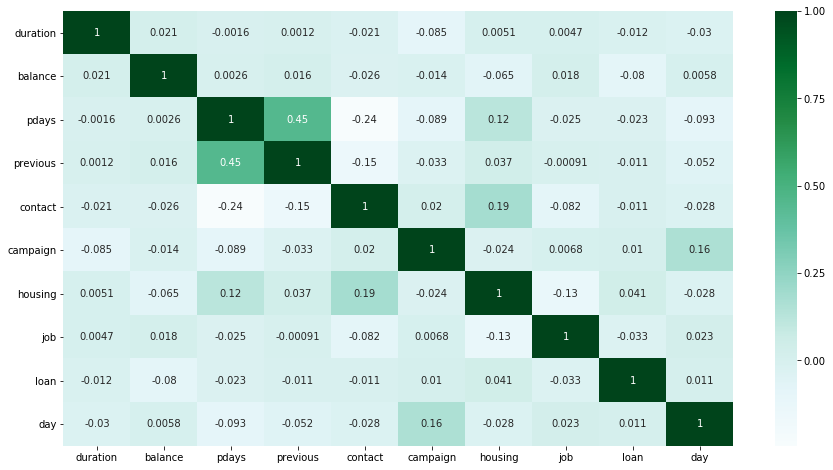

In [113]:
plt.figure(figsize=(15,8))
g1 = sns.heatmap(data_x.corr(), annot=True, cmap= 'BuGn')

# Model Building

In [114]:
classifier1 = sm.Logit(y, data_x).fit()

Optimization terminated successfully.
         Current function value: 0.292027
         Iterations 8


In [115]:
classifier1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45201
Method:                           MLE   Df Model:                            9
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                  0.1908
Time:                        13:44:55   Log-Likelihood:                -13203.
converged:                       True   LL-Null:                       -16315.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0033   5.71e-05     57.265      0.000       0.003       0.003
balance     -1.06e-05   4.92e-06     -2.154      0.031   -2.03e-05   -9.55e-07
pdays          0.0007      0.000      4.418      0.000       0.000       0.001
previous       0.0633      0.008      7.973      0.000       0.048       0.079
contact       -0.7889      0.025    -32.092      0.000      -0.837      -0.741
campaign      -0.3301      0.011    -28.950      0.000      -0.352      -0.308
housing       -1.4508      0.034    -42.724      0.000      -1.517      -1.384
job           -0.0937      0.005    -20.621      0.000      -0.103      -0.085
loan          -1.0626      0.055    -19.331      0.000      -1.170      -0.955
day           -0.0517      0.002    -30.179      0.000      -0.055      -0.048
==============================================================================
"""

In [116]:
classifier1.params

duration    0.003271
balance    -0.000011
pdays       0.000733
previous    0.063267
contact    -0.788923
campaign   -0.330111
housing    -1.450791
job        -0.093711
loan       -1.062574
day        -0.051714
dtype: float64

In [117]:
y_pred1 = classifier1.predict(data_x)
y_pred1.head(5)

0    0.040651
1    0.018576
2    0.009769
3    0.031490
4    0.072443
dtype: float64

In [118]:
y_pred1 = list(map(round, y_pred1))
y_pred1 = pd.DataFrame(y_pred1)

In [119]:
prediction1 = pd.concat([y,y_pred1], axis = 1)
prediction1.head(5)

,y,0
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [120]:
prediction1.tail(5)

,y,0
45206,1,1.0
45207,1,0.0
45208,1,1.0
45209,0,0.0
45210,0,1.0


In [121]:
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(data_x)
scaled_x = scalar.transform(data_x)

C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [122]:
scaled_x

array([[5.30703538e-02, 2.09836772e-02, 0.00000000e+00, ...,
        3.63636364e-01, 0.00000000e+00, 1.33333333e-01],
       [3.07035380e-02, 2.83960167e-04, 0.00000000e+00, ...,
        8.18181818e-01, 0.00000000e+00, 1.33333333e-01],
       [1.54534364e-02, 1.95834598e-05, 0.00000000e+00, ...,
        1.81818182e-01, 1.00000000e+00, 1.33333333e-01],
       ...,
       [2.29158194e-01, 5.59597364e-02, 2.11251435e-01, ...,
        4.54545455e-01, 0.00000000e+00, 5.33333333e-01],
       [1.03294022e-01, 6.54087558e-03, 0.00000000e+00, ...,
        9.09090909e-02, 0.00000000e+00, 5.33333333e-01],
       [7.34038227e-02, 2.90912295e-02, 2.15843858e-01, ...,
        1.81818182e-01, 0.00000000e+00, 5.33333333e-01]])

In [123]:
classifier2 = LogisticRegression()
classifier2.fit(scaled_x,y)

C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
classifier2.coef_

array([[17.70287169,  2.00669249,  2.31924637,  3.64138738, -1.16255051,
        -6.10963341, -1.03101385,  0.1574699 , -0.71964382, -0.17198287]])

In [125]:
proba = classifier2.predict_proba(scaled_x)
proba

array([[0.97320904, 0.02679096],
       [0.98126505, 0.01873495],
       [0.99362392, 0.00637608],
       ...,
       [0.13359988, 0.86640012],
       [0.82163895, 0.17836105],
       [0.63932962, 0.36067038]])

In [126]:
y_pred2 = classifier2.predict(scaled_x)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

#  Model Validation

In [127]:
conf_matrix = confusion_matrix(y,y_pred2)
print(conf_matrix)

[[39267   655]
 [ 4303   986]]


In [128]:
pd.crosstab(y,y_pred2)

col_0,0,1
y,,
0,39267,655
1,4303,986


In [129]:
accuracy = sum(y==y_pred2)/data.shape[0]           #data.shape[0] : All rows
accuracy

0

In [130]:
print( classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.28      5289

   micro avg       0.89      0.89      0.89     45211
   macro avg       0.75      0.59      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [131]:
roc_score = roc_auc_score(y, y_pred2)
roc_score

0.5850088306533152

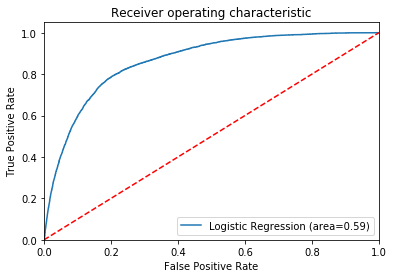

In [132]:
fpr, tpr, thresholds = roc_curve(y,proba[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1],'r--')     # 'r--' : red coloured dash line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [133]:
fpr

array([0.00000000e+00, 2.50488452e-05, 2.50488452e-05, ...,
       9.88577727e-01, 9.88577727e-01, 1.00000000e+00])

In [134]:
tpr

array([0.00000000e+00, 0.00000000e+00, 1.89071658e-04, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])

In [135]:
model1 = LogisticRegression(solver='saga', C=20.0, random_state=1)
model1.fit(scaled_x, y)

LogisticRegression(C=20.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
new_prob = model1.predict_proba(scaled_x)
new_prob

array([[0.97466396, 0.02533604],
       [0.98294935, 0.01705065],
       [0.99446154, 0.00553846],
       ...,
       [0.1096837 , 0.8903163 ],
       [0.82672132, 0.17327868],
       [0.52685741, 0.47314259]])

In [137]:
y_pred3 = model1.predict(scaled_x)
y_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [138]:
model1.score(scaled_x, y)

0.8908451483046161

In [139]:
cr = classification_report(y,y_pred3)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

   micro avg       0.89      0.89      0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



In [140]:
roc_score1 = roc_auc_score(y, y_pred3)
roc_score1

0.5938260786450008

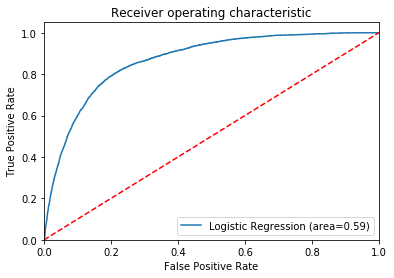

In [141]:
fpr, tpr, thresholds = roc_curve(y,new_prob[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [142]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.93437203e-01, 9.93437203e-01, 1.00000000e+00])

In [143]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])

In [144]:
data_x.shape

(45211, 10)

In [145]:
y.shape

(45211,)

In [146]:
x3 = data_x.values
y3 = y.values

In [147]:
# Splitting the data for training and testing

xtrain, xtest, ytrain, ytest = train_test_split(
        x3, y3, test_size = 0.20, random_state = 10)

# standardizing 'xtrain' and 'xtest'

In [148]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain) 

xtest = sc_x.transform(xtest)

C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ujwala\Anaconda2\sip\samuuju\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [149]:
print(xtrain[0:5,:])

[[-0.30738733 -0.45356646 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326  1.42538934 -0.43702462  0.62689417]
 [-0.29571388  0.01207209 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326 -1.01971428  2.28820062 -0.93643115]
 [-0.92218909 -0.40758954 -0.41189017 -0.24419181  1.51764318  2.34210565
   0.89399326 -1.01971428  2.28820062 -0.21489639]
 [ 0.43193125 -0.35900401 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [-0.33073423  2.16809592 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326 -1.01971428 -0.43702462 -0.33515218]]


In [150]:
print(xtest[0:5,:])

[[ 0.41636665 -0.45356646 -0.41189017 -0.24419181  1.51764318  0.39881633
   0.89399326  1.42538934 -0.43702462  0.50663838]
 [-0.73930502  0.13989443 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [ 2.52147902  0.28108595 -0.41189017 -0.24419181  1.51764318 -0.24894678
   0.89399326 -0.10280042 -0.43702462  0.26612679]
 [-0.25291122  1.97538417 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326  1.42538934 -0.43702462 -1.05668694]
 [ 0.69652948 -0.43432789 -0.41189017 -0.24419181  1.51764318 -0.24894678
  -1.11857666 -0.71407633 -0.43702462 -0.33515218]]


# Model Building

In [151]:
classifier3 = LogisticRegression(C = 10, random_state = 10, solver = 'lbfgs', n_jobs = 10)
classifier3.fit(xtrain, ytrain)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=10,
          penalty='l2', random_state=10, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
y_pred4 = classifier3.predict(xtest)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [154]:
# Printing Confusion Matrix

conf_matrix3 = confusion_matrix(ytest,y_pred4)
conf_matrix3

array([[7851,  143],
       [ 836,  213]], dtype=int64)

In [155]:
# probability prediction for target variable
y_prob3 = classifier3.predict_proba(xtest)
y_prob3

array([[0.97617463, 0.02382537],
       [0.98889506, 0.01110494],
       [0.787309  , 0.212691  ],
       ...,
       [0.95289641, 0.04710359],
       [0.96570544, 0.03429456],
       [0.85684936, 0.14315064]])

# Model validation

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred4)

0.8917394669910428

In [157]:
roc_score3 = roc_auc_score(ytest, y_pred4)
roc_score3

0.5925810539983157

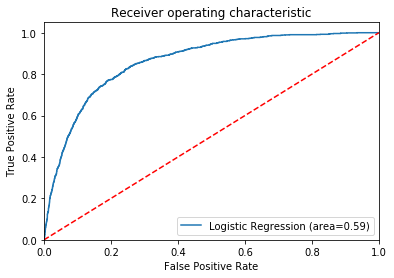

In [158]:
fpr, tpr, thresholds = roc_curve(ytest,y_prob3[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [159]:
cr3 = classification_report(ytest,y_pred4)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.21      0.31      5289

   micro avg       0.89      0.89      0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.87     45211



#So we got an improved version of Logistic Classifier with accuracy as '0.8917394' and roc_score as '0.5925810

In [160]:
fpr[:5,]

array([0.        , 0.00012509, 0.00012509, 0.00025019, 0.00025019])

In [161]:
tpr[:5,]

array([0.        , 0.        , 0.00381316, 0.00381316, 0.00571973])